# Fiducial intervals

$$\{ X_1, \dots, X_n\} \text{ sample from } X\sim N(\mu, \sigma)$$

$$\bar X = \frac{1}{n}\sum_{i=1}^n X_i \sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$$

$$Z = \frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N(0, 1)$$

Fixed $\alpha$, find $z$ such that

$$\mathrm P(|Z|<z) = \alpha $$

In [30]:
%matplotlib inline

import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets, interact

def ci_graph(conf):
    Z = st.norm()
    q = Z.ppf(1-(1-conf)/2)
    xs = np.arange(-q, q+.1, .1)
    plt.plot(xs, Z.pdf(xs))
    left_tail = np.arange(-3, -q+.1, .1)
    right_tail = np.arange(q, 3, .1)
    plt.fill_between(right_tail, 0, Z.pdf(right_tail), facecolor='lightblue')
    plt.fill_between(left_tail, 0, Z.pdf(left_tail), facecolor='lightblue')
    plt.title('$z = {:.2f}$'.format(q))
    plt.show()

rangeSlider = widgets.FloatSlider(
    value = .95,
    min = .1,
    max = .99,
    step = .01,
    description = 'Confidence',
    continuous_update = False
)

interact(ci_graph, conf=rangeSlider);

Let $\chi_p = \Phi^{-1}(p)$ denote the $p$ quantile of $Z$

The answer is

$$ z = \chi_{1-\frac{1-\alpha}{2}} = \chi_{\frac{1+\alpha}{2}} $$

In [46]:
def HTML_with_style(df, style=None, random_id=None):
    from IPython.display import HTML
    import numpy as np
    import re

    df_html = df.to_html()

    if random_id is None:
        random_id = 'id%d' % np.random.choice(np.arange(1000000))

    if style is None:
        style = """
        <style>
            table#{random_id} {{color: blue}}
        </style>
        """.format(random_id=random_id)
    else:
        new_style = []
        s = re.sub(r'</?style>', '', style).strip()
        for line in s.split('\n'):
                line = line.strip()
                if not re.match(r'^table', line):
                    line = re.sub(r'^', 'table ', line)
                new_style.append(line)
        new_style = ['<style>'] + new_style + ['</style>']

        style = re.sub(r'table(#\S+)?', 'table#%s' % random_id, '\n'.join(new_style))

    df_html = re.sub(r'<table', r'<table id=%s ' % random_id, df_html)

    return HTML(style + df_html)

style = """
<style>
    table tr :first-child{display: none;}
</style>
"""

Z = st.norm()
HTML_with_style(pd.DataFrame([('{:.2f}'.format(alpha),
  '{:.2f}'.format(Z.ppf((1+alpha)/2))) for alpha in np.arange(.5, 1, .05)],
            columns=['alpha', 'z']),
                style)

,alpha,z
0,0.50,0.67
1,0.55,0.76
2,0.60,0.84
3,0.65,0.93
4,0.70,1.04
5,0.75,1.15
6,0.80,1.28
7,0.85,1.44
8,0.90,1.64
9,0.95,1.96


$$\mathrm P(-\chi_{\frac{1+\alpha}{2}} < Z < \chi_{\frac{1+\alpha}{2}}) = 1 - \alpha $$

In [55]:
def inner_ci_graph(conf):
    Z = st.norm()
    q = Z.ppf(1-(1-conf)/2)
    xs = np.arange(-q, q+.1, .1)
    plt.fill_between(xs, 0, Z.pdf(xs), facecolor='lightblue')
    left_tail = np.arange(-3, -q+.1, .1)
    right_tail = np.arange(q, 3, .1)
    plt.plot(right_tail, Z.pdf(right_tail))
    plt.plot(left_tail, Z.pdf(left_tail))
    plt.title('$ P({:.2f} < Z < {:.2f}) = {:.2f}$'.format(-q, q, conf))
    plt.show()

rangeSlider = widgets.FloatSlider(
    value = .95,
    min = .1,
    max = .99,
    step = .01,
    description = 'Confidence',
    continuous_update = False
)

interact(inner_ci_graph, conf=rangeSlider);

But

$$Z = \frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N(0, 1)$$

so

$$\mathrm P\left(
    -\chi_{\frac{1+\alpha}{2}} < Z < \chi_{\frac{1+\alpha}{2}}
  \right) = 
  \mathrm P\left(
    \bar X -\chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}} <
    \mu < \bar X + \chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}}
  \right) $$

Summing up

$$\mathrm P\left(
    \bar X -\chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}} <
    \mu < \bar X + \chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}}
  \right) = \alpha $$
  
Thus

$$\left(\bar X -\chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}},
       \bar X + \chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right)$$

is a $\alpha$-confidence interval for $\mu$

In [68]:
mu = 1200
sigma = 37
n = 30
X = st.norm(mu, sigma)

In [69]:
sample = pd.DataFrame(X.rvs(n), columns=['Martian height'])
sample.head()

,Martian height
0,1171.315354
1,1227.380840
2,1203.516290
3,1158.355690
4,1158.515871


In [70]:
Z = st.norm()
x_bar = sample['Martian height'].mean()
alpha = 0.95
chi = Z.ppf((1+alpha)/2)
confidence_interval = (x_bar - chi * sigma / math.sqrt(n),
                       x_bar + chi * sigma / math.sqrt(n))

print confidence_interval

(1186.7169992958823, 1213.1970726228963)


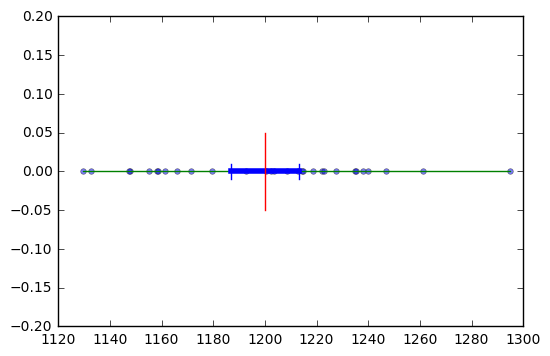

In [90]:
plt.plot(sample['Martian height'], [0]*n, 'o', ms=4, alpha=0.5)
plt.plot((sample['Martian height'].min(), sample['Martian height'].max()), (0,0))
plt.plot(confidence_interval, (0, 0), c='b', linewidth=4)
plt.plot(2*[confidence_interval[0]], (-.01, .01), c='b')
plt.plot(2*[confidence_interval[1]], (-.01, .01), c='b')
plt.plot(2*[mu], (-.05, .05), c='r')
plt.ylim(-.2, .2)
plt.show()

In [88]:
confidence_interval[0] <= mu <= confidence_interval[1]

True

Frequentistic interpretatation of the event

$$\bar X -\chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}} <
    \mu < \bar X + \chi_{\frac{1+\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [91]:
def ci_mu_norm(mu, sigma, alpha, n):
    X = st.norm(mu, sigma)
    sample = X.rvs(n)
    chi = Z.ppf((1+alpha)/2)
    x_bar = sample.mean()
    ci = (x_bar - chi * sigma / math.sqrt(n),
          x_bar + chi * sigma / math.sqrt(n))
    return ci

In [100]:
for _ in range(100):
    ci = ci_mu_norm(mu, sigma, 0.99, n)
    if not ci[0] <= mu <= ci[1]:
        print ci

(1204.9249374981764, 1239.7256529061447)


For a more compact notation, let's denote by $1 - \delta$ the confidence value.

$$ \mathrm P \left(|Z| < \chi_{\frac{1+\alpha}{2}} \right) = \alpha $$

translates to

$$ \mathrm P \left(|Z| < \chi_{\frac{\delta}{2}} \right) = 1-\delta $$

$\sigma$ is supposed to be known

should this not be the case?

Instead of

$$\frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}}$$

use

$$\frac{\bar X - \mu}{\frac{S}{\sqrt{n}}},$$

$S$ being the sample standard deviation.

Is the resulting statistic still normal?

Short answer: no.

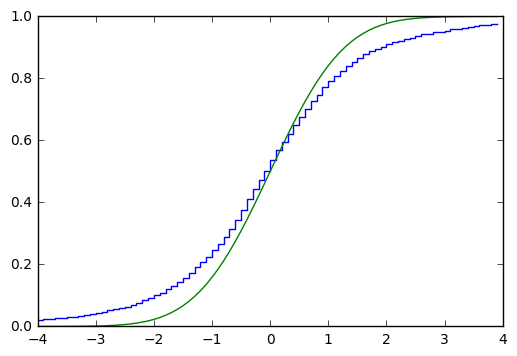

In [128]:
def t_stat(sample):
    x_bar = sample.mean()
    s = sample.std()
    return x_bar / s * len(sample)**0.5

Z = st.norm()
n = 5000
samples = np.split(Z.rvs(4*n), n)
t_vals = map(t_stat, samples)

import statsmodels.api as sm

ecdf = sm.distributions.ECDF(t_vals)
x = np.arange(-4, 4, 0.1)
y = ecdf(x)
plt.step(x, y)
plt.plot(x, Z.cdf(x))
plt.show()

In [108]:
def t_graph(n):
    T = st.t(n)
    Z = st.norm()
    xs = np.arange(-4, 4, 0.1)
    plt.plot(xs, T.pdf(xs))
    plt.plot(xs, Z.pdf(xs), alpha=0.4, c='b', linewidth=3)
    plt.ylim(0, 0.4)
    plt.show()

interact(t_graph, n=widgets.IntSlider(
    value = 4,
    min = 1,
    max = 30,
    description = 'Degrees of freedom',
    continuous_update = True
));